In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from sklearn.preprocessing import OneHotEncoder
from keras.models import Sequential, load_model
import seaborn as sns; sns.set()
from keras.datasets import cifar10
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from keras.callbacks import EarlyStopping
from keras.datasets import cifar10
from sklearn.metrics import accuracy_score
from torch.utils.data import random_split

In [2]:
# Loading data
#To print the images
(X_train1, y_train1), (X_test1, y_test1) = cifar10.load_data()


#Creating transform to make changes in images
#Here it have transgormation sizes
transform = transforms.Compose([transforms.Resize(256),transforms.CenterCrop(224),transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),])

170500096/170498071 [==============================] - 11s 0us/step


In [3]:
print(len(X_train1))
print(len(X_test1))

50000
10000


In [4]:
#labels
#Of different categories
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [5]:
print(labels)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


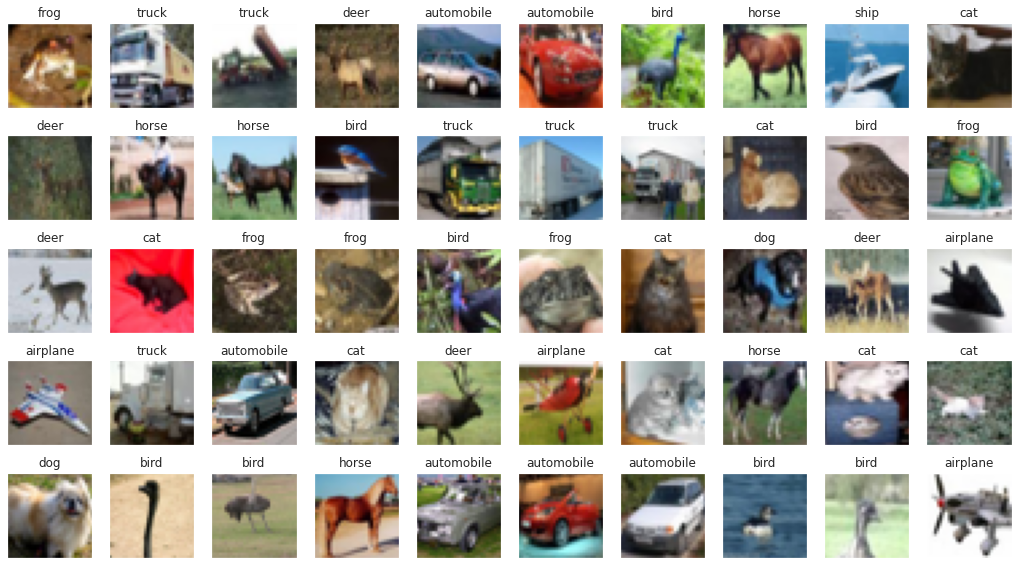

In [ ]:
# Having first 50 images in X_train
#Displaying them
index1 = 0
fig, axes = plt.subplots(ncols=10, nrows=5, figsize=(18, 10))
#Looping to display images
for x in range(5):
    for y in range(10):
        #Here we set the title/labels
        axes[x,y].set_title(labels[y_train1[index1][0]])
        #Here we display the image
        axes[x,y].imshow(X_train1[index1])
        #For x and y axis
        axes[x,y].get_xaxis().set_visible(False)
        axes[x,y].get_yaxis().set_visible(False)
        #Incrementing the index by 1
        index1 =index1+ 1
plt.show()

In [ ]:
#Loading data again and splitting it into validation set
#Training Data 
X_train = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
#Spliting into validation data as well
X_train, validation_data = random_split(X_train, [40000, 10000])
y_train = torch.utils.data.DataLoader(X_train, shuffle=True, batch_size=4, num_workers=2)
#Here we are taking validation loader as well
validation_loader = torch.utils.data.DataLoader(validation_data, batch_size=4, shuffle=True, num_workers=2)

#Test data
X_test = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
y_test = torch.utils.data.DataLoader(X_test, shuffle=False,batch_size=4,  num_workers=2)



Files already downloaded and verified
Files already downloaded and verified


In [ ]:
#Now using the AlexNet
#It's a predefined model
Alexnet = torch.hub.load('pytorch/vision:v0.6.0', 'alexnet', pretrained=True)
#TO look for the features and classifiers of it
Alexnet.eval()

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.6.0


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [ ]:
#To avoid overfitting and at the end we have 10 labels only
#Passing to different layers
Alexnet.classifier[1] = nn.Linear(9216,4096)
Alexnet.classifier[4] = nn.Linear(4096,1024)
Alexnet.classifier[6] = nn.Linear(1024,10)

In [ ]:
#Here we are checking for the current working device
source = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
#If it's working in GPU then it'll print cuda:0 else cpu
print(source)

#Moving the input and Alexbet to GPU for speed 
#It increases the performance
Alexnet.to(source)

cuda:0


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [ ]:
import torch.optim as optim
#Now finding optimizer and loss
#in optimizer we passes the momentum and learning rate as lr=0.001
opti = optim.SGD(Alexnet.parameters(), lr=0.001, momentum=0.9)
#Loss
cr_loss = nn.CrossEntropyLoss()

#Looping over the different epochs
for epoch in range(6):  
    #Initilize the loss 
    loss_current = 0.0
    #Looping over the training data y_train
    for i, data in enumerate(y_train, 0):
        #Taking the input(images) and labels
        images, labels = data[0].to(source), data[1].to(source)
        # Gradient
        opti.zero_grad()
        #Passing the images(input) to the oredefined alexnet model
        #Getting the output
        output = Alexnet(images)

        loss = cr_loss(output, labels)
        loss.backward()
        opti.step()
        # Having loss 
        loss_current =loss_current+ loss.item()
        #Condition
        if i % 2000 == 1999:  
            #Printing the epochs and loss
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, loss_current / 2000))
            loss_current = 0.0



[1,  2000] loss: 1.223
[1,  4000] loss: 0.907
[1,  6000] loss: 0.793
[1,  8000] loss: 0.729
[1, 10000] loss: 0.706
[2,  2000] loss: 0.547
[2,  4000] loss: 0.531
[2,  6000] loss: 0.525
[2,  8000] loss: 0.508
[2, 10000] loss: 0.516
[3,  2000] loss: 0.343
[3,  4000] loss: 0.385
[3,  6000] loss: 0.379
[3,  8000] loss: 0.378
[3, 10000] loss: 0.384
[4,  2000] loss: 0.232
[4,  4000] loss: 0.262
[4,  6000] loss: 0.277
[4,  8000] loss: 0.287
[4, 10000] loss: 0.288
[5,  2000] loss: 0.187
[5,  4000] loss: 0.201
[5,  6000] loss: 0.205
[5,  8000] loss: 0.228
[5, 10000] loss: 0.255
[6,  2000] loss: 0.135
[6,  4000] loss: 0.163
[6,  6000] loss: 0.162
[6,  8000] loss: 0.178
[6, 10000] loss: 0.177


In [ ]:
#Transfering test and predicted value GPU
#For performance and speed
#Here finding the prediction
y_predicted = torch.tensor([]).to(source)
#For finding the test
y_tested = torch.tensor([]).to(source)


In [ ]:
#initialising values with zero to find the accuracy
a=0
b=0

In [ ]:
#Looping over the test set
with torch.no_grad():
    #test data
    for data in y_test:
        #Taking the input as images and labels
        inp, labels = data[0].to(source), data[1].to(source)
        #Passing the input(images) to alexnet
        #Finding the output
        ot = Alexnet(inp)
        #Here we will be calculating the predictions
        #Using the max function
        #And storing into temp
        _, temp = torch.max(ot.data, 1)
        #Predictions
        y_predicted = torch.cat((y_predicted, ot),dim=0)
        #Test
        y_tested = torch.cat((y_tested, labels),dim=0)
        #MAking changes with labels
        a = a+ (temp == labels).sum().item()
        b =b+ labels.size(0)

In [ ]:
#Calculating Accuracy
div=a/b
accuracy=div*100
print("Accuracy ",accuracy,"%")

Accuracy  81.89 %


In [ ]:
#Getting back to CPU
#To print matrix
#Here we have calculated the predicted value of y
y_predicted_new=y_predicted.argmax(dim=1).cpu()
#Here we have test value
y_test_new=y_tested.cpu()


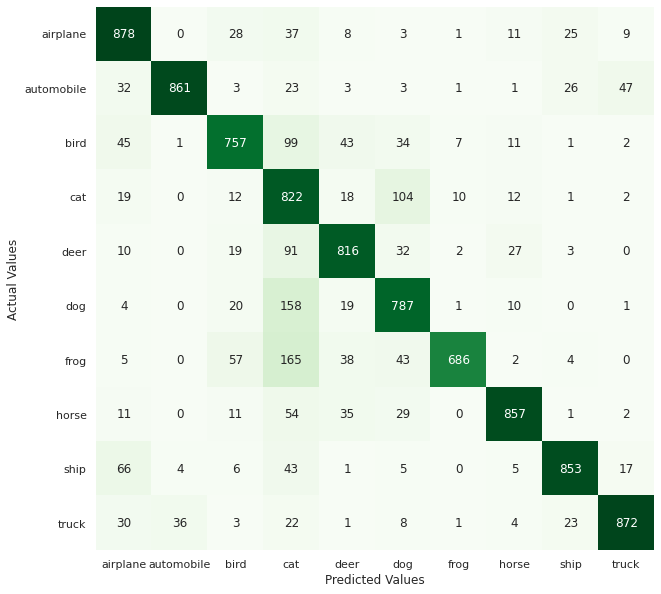

In [ ]:
# Plotting Confusion matrix 
cm = confusion_matrix(y_test_new, y_predicted_new)
#Providing the figure size
plt.figure(figsize=(10,10))
#Creating the heat map
sns.heatmap(cm, xticklabels=labels,yticklabels=labels,annot=True,cbar=False ,fmt='d', cmap=plt.cm.Greens)
#LAbels
#X axis and y axis
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()
